# RF Model

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import cv2
import PIL
from PIL import Image
import math
from time import sleep
import time
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

def preprocess_train(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[95:185,110:210]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    for i in range(len(photo2)):
        for j in range(np.size(photo2,1)):
            if photo2[i,j,2]< 235 and photo2[i,j,1]<235 and photo2[i,j,0]<235:
                photo2[i,j] = [255,255,255]
            else:
                photo2[i,j] = [0,0,0]
    if(print):
        plt.figure()
        plt. imshow(photo2)
        plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c)
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    for i in range(len(photo_C2)):
        for j in range(np.size(photo_C2,1)):
            if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
                photo_C2[i,j] = [0,0,0]
            else:
                photo_C2[i,j] = [255,255,255]
    if(print):
        plt.figure()
        plt. imshow(photo_C2)
        plt.title('Photo finale')
    return(photo_C2)  

def cnn_model():
    model = models.Sequential()
    model.add(layers.Dense(units=7104, activation='relu', input_shape=[14208]))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(100,activation='relu'))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(1))
    return model
        
#Training step : recover pictures and preprocess them

image_path_list = []
P = []
P2 = []

imageDir = "pictures white"
for file in os.listdir(imageDir):
    image_path_list.append(os.path.join(imageDir, file))
for i in range(len(image_path_list)):
    P.append(np.asarray(PIL.Image.open(image_path_list[i])))
    

for i in range(len(P)):
    #print("Picture",i)
    P2.append(preprocess_train(P[i],0.5,0))
    #plt.figure()
    #plt.imshow(P2[i])
    
#Création de la dataframe
Data = pd.DataFrame()
for i in range(len(P2)):
    tmp = np.reshape(P2[i],6750)
    Data[i] = tmp
    
Data = Data.T
#Data = Data.drop(0)
#Data = Data.drop(1)
#Data = Data.drop(3)
#Data = Data.drop(4)
#Data = Data.drop(6)
#Data = Data.drop(7)

defaut = [0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0]

Data["Défauts"] = defaut

#Data = pd.concat([Data,Data.loc[Data["Défauts"] == 0]]) #To get a balanced dataset, we add two times the 'no default' pics

y = Data['Défauts']
X = Data.drop(['Défauts'],axis=1)
X = X/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

#RF Model

clf = RandomForestClassifier(max_depth=5, n_estimators =10, bootstrap = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(accuracy_score(y_train, clf.predict(X_train)))

print(y_pred)
print(y_test)
accuracy_score(y_test, y_pred)

0.9555555555555556
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 0]
3     1
8     1
43    0
34    1
51    0
55    0
13    1
0     0
21    1
1     0
45    0
44    0
32    1
17    1
47    0
Name: Défauts, dtype: int64


0.8666666666666667

# CNN Model

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
import cv2
import PIL
from PIL import Image
import math
from time import sleep
import time
import sklearn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.utils import plot_model

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


def preprocess_train(photo, comp_rate,print):
    #Photo imported using PIL and compression rate in decimal (0.9 --> 90% comp rate)
    #P1 : Rognage de la photo
    photo=np.asarray(photo)
    photo = photo[95:185,110:210]
    if(print):
        plt.figure()
        plt. imshow(photo)
        plt.title('Originale rognée')
    
    #P2 : Définition de la zone d'intérêt de la pièce
    photo2 = np.copy(photo)
    #photo3 = np.empty((len(photo2),np.size(photo2,1)))
    #for i in range(len(photo2)):
    #    for j in range(np.size(photo2,1)):
    #        photo3[i,j] = 
    
    #gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    #photo3 = gray(photo2)
    
            
    #        if photo2[i,j,2]< 235 and photo2[i,j,1]<235 and photo2[i,j,0]<235:
    #            photo2[i,j] = [255,255,255]
    #        else:
    #            photo2[i,j] = [0,0,0]
    #if(print):
        #plt.figure()
        #plt. imshow(photo3,cmap = plt.get_cmap(name = 'gray'))
        #plt.title('Photo noire et blanc avec pièce isolée')
    
    #P3 : Compression de la photo en vue du modèle de ML
    Photo_c = Image.fromarray(np.uint8((photo2)))
    x,y = Photo_c.size
    x2, y2 = math.floor(x-comp_rate*x/1), math.floor(y-comp_rate*y/1)
    Photo_c = Photo_c.resize((x2,y2),Image.ANTIALIAS)
    Photo_c = np.asarray(Photo_c)
    if(print):
        plt.figure()
        plt. imshow(Photo_c, cmap = plt.get_cmap(name = 'gray'))
        plt.title("Image compressée")
    
    #P4 : Cleaning Post-Compression
    photo_C2 = np.copy(Photo_c)
    #for i in range(len(photo_C2)):
    #    for j in range(np.size(photo_C2,1)):
    #        if photo_C2[i,j,2]< 60 and photo_C2[i,j,1]<60 and photo_C2[i,j,0]<60:
    #            photo_C2[i,j] = [0,0,0]
    #        else:
    #            photo_C2[i,j] = [255,255,255]
    #if(print):
    #    plt.figure()
    #    plt. imshow(photo_C2, cmap = plt.get_cmap(name = 'gray'))
    #    plt.title('Photo finale')
    return(photo_C2)  
    

def dense_model():
    model = models.Sequential()
    model.add(layers.Dense(units=7104, activation='relu', input_shape=[14208]))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(100,activation='relu'))
    model.add(layers.Dense(10, activation = "relu"))
    model.add(layers.Dense(1))
    return model

def cnn_model(comp_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(math.floor(90-comp_rate*90/1), math.floor(100-comp_rate*100/1), 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2))
    return model
    
#Training step : recover pictures and preprocess them

image_path_list = []
P = []
data = []

imageDir = "pictures white"
for file in os.listdir(imageDir):
    image_path_list.append(os.path.join(imageDir, file))
for i in range(len(image_path_list)):
    P.append(np.asarray(PIL.Image.open(image_path_list[i])))

comp_rate = 0.8

for i in range(len(P)):
    #print("Picture",i)
    data.append(preprocess_train(P[i],comp_rate,0))
    #plt.figure()
    #plt.imshow(P2[i])
   

defaut = [0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0]
nodef =  [1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,1]

X = data
y = [defaut,nodef]
y = np.array(y).T
#y = y.reshape(1,60,2)
print("Shape X is",np.shape(X)) 
print("Shape y is",np.shape(y)) 
for i in range(len(X)):
    X[i] = X[i]/255.0
print(np.shape(X))    

X = np.array(X).reshape(len(X),-1)
    
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 1)

X_train = X_train.reshape((len(X_train),math.floor(90-comp_rate*90/1), math.floor(100-comp_rate*100/1), 3))
X_test = X_test.reshape((len(X_test),math.floor(90-comp_rate*90/1), math.floor(100-comp_rate*100/1), 3))

print("Shape X_train is",np.shape(X_train)) 
print("Shape y_train is",np.shape(y_train))

print("Shape X_test is",np.shape(X_test)) 
print("Shape y_test is",np.shape(y_test))

model = cnn_model(comp_rate)


model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


#from keras.optimizers import SGD

#opt = SGD(lr=0.01, momentum=0.9)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=15,
    #callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    epochs=40)


Shape X is (60, 18, 20, 3)
Shape y is (60, 2)
(60, 18, 20, 3)
Shape X_train is (45, 18, 20, 3)
Shape y_train is (45, 2)
Shape X_test is (15, 18, 20, 3)
Shape y_test is (15, 2)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 18, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten (Fla

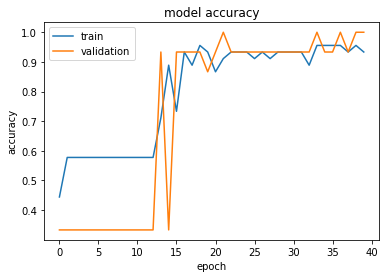

In [2]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()